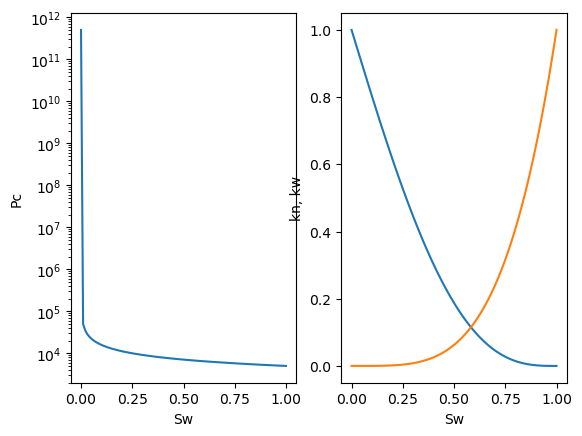

In [1]:
from mcworther import BrooksCorey

model = BrooksCorey(pd=5000, lambda_=2.0)
model.plot()

S0 = 1.0, Si = 0.010


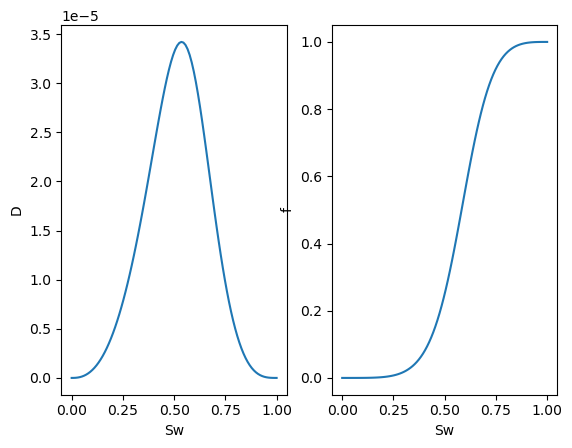

In [2]:
from mcworther import McWorther

pc_0 = 5000.0
pc_i = 5.e4

S0 = model.Sw(pc_0)
Si = model.Sw(pc_i)

print(f"S0 = {S0}, Si = {Si:.3f}")

problem = McWorther(model, 
                    phi=0.3,
                    K=1.0e-10,
                    muw=1.e-3,
                    mun=1.e-3,
                    S0=S0,
                    Si=Si)

problem.plot_D_f()

['capillary_pressure', 'gas_pressure', 'saturation']


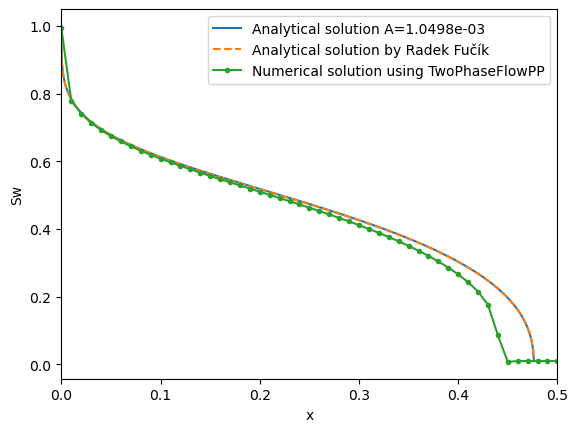

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

# 1. Plot analytical solution
problem.plot_solution()

# 2. Compare with analytical solution from the online tool of Radek Fučík
# https://mmg.fjfi.cvut.cz/~fucik/index.php?page=exact
# - Parameters are stated above
# - Primary variable is the wetting phase saturation
# - Brooks-Corey model
# - Original method (McWhorter and Sunada 1990)

# Zeroth column is location, first column is saturation
exact = np.loadtxt("solution_Sw_TwoPhaseFlowPP.txt")

plt.plot(exact[:, 0], exact[:, 1], '--', label="Analytical solution by Radek Fučík")

# 3. Compare with OGS TwoPhaseFlowPP

mesh = pv.read("twophaseflow_ts_627_t_1000.000000.vtu")

print(mesh.point_data.keys())

Sw=mesh["saturation"]
x=mesh.points[:,0]

ind = np.argsort(x)
x = x[ind]
Sw = Sw[ind]

plt.plot(x, Sw, '.-', label="Numerical solution using TwoPhaseFlowPP")

plt.xlim([0, 0.5])

plt.legend()
plt.show()
